# Questão do Livro 2.7

## 2.7.a

Find the weekly subscription price and the advertising price that will maximize profit. Use the five-step method, and model as anunconstrained optimization problem.


In [1]:
from sympy import solve, var, symbols, diff, N, simplify, Eq, lambdify
from sympy.plotting import plot, plot3d

In [2]:
q_a = var('q_assinatura', real=True)
q_p = var('q_publicidade', real=True)

n_a = 80000 - 5000*q_a - 1000*q_p
n_p = 350 - 50*q_p

p_a = 1.5 + 0.10*q_a
p_p = 250.0 + 100*q_p

R = n_a*p_a + n_p*p_p
C = 0
L = R - C

L

(350 - 50*q_publicidade)*(100*q_publicidade + 250.0) + (0.1*q_assinatura + 1.5)*(-5000*q_assinatura - 1000*q_publicidade + 80000)

In [3]:
print("Lucro normal")
L.subs({q_a: 0, q_p: 0})

Lucro normal


207500.000000000

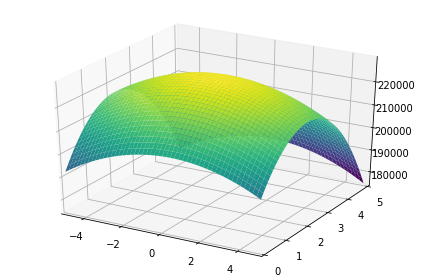

In [4]:
plot3d(L, (q_a, -5, 5), (q_p, 0, 5))

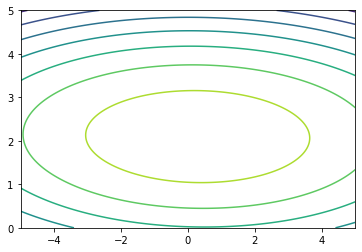

In [5]:
import numpy as np
import matplotlib

def contour_plot(space_a, space_b):
    f = lambdify((q_a, q_p), L, 'numpy')

    a = np.linspace(space_a[0], space_a[1], 1000)
    b = np.linspace(space_b[0], space_b[1], 1000)
    x, y = np.meshgrid(a, b)
    return matplotlib.pyplot.contour(x, y, f(x, y))

contour_plot((-5, 5), (0, 5))

### Otimização sem restrição

In [6]:
simplify(L)

-500.0*q_assinatura**2 - 100.0*q_assinatura*q_publicidade + 500.0*q_assinatura - 5000.0*q_publicidade**2 + 21000.0*q_publicidade + 207500.0

In [7]:
dLdq_a = diff(L, q_a)
simplify(dLdq_a)

-1000.0*q_assinatura - 100.0*q_publicidade + 500.0

In [8]:
dLdq_p = diff(L, q_p)
simplify(dLdq_p)

-100.0*q_assinatura - 10000*q_publicidade + 21000.0

In [9]:
s = solve([dLdq_a, dLdq_p], [q_a, q_p], dict=True , rational=True)
s[0]

{q_assinatura: 290/999, q_publicidade: 2095/999}

In [10]:
print("Lucro ótimo")
L.subs(s[0])

Lucro ótimo


229592.092092092

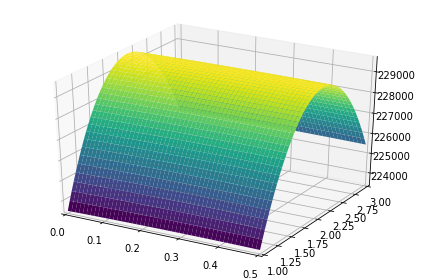

In [11]:
plot3d(L, (q_a, 0, 0.5), (q_p, 1, 3))

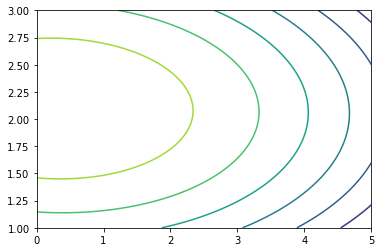

In [12]:
contour_plot((0, 5), (1, 3))

## 2.7.b

Examine the sensitivity of your conclusions in part (a) to the assumption of 5,000 lost sales when the price of the paper increases byten cents.